<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/W7_NN/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as pl

In [2]:
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

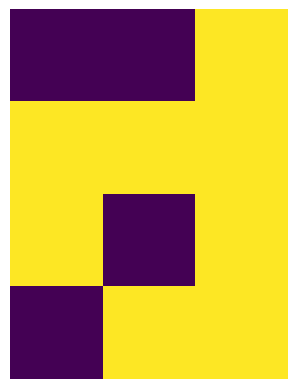

In [6]:
pl.imshow(X);
pl.axis('off');

In [7]:
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [8]:
y.shape

(4, 1)

In [9]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# Basic architecture: 1 layer

L'idea è predirre i risultati sulla basa della matrice X. Lo facciamo con una architettura base:
- 1 layer
- 3 neuroni
- 4 osservazioni



In [10]:
def sigmoid(x):
  return 1./(1. + np.exp(-x))

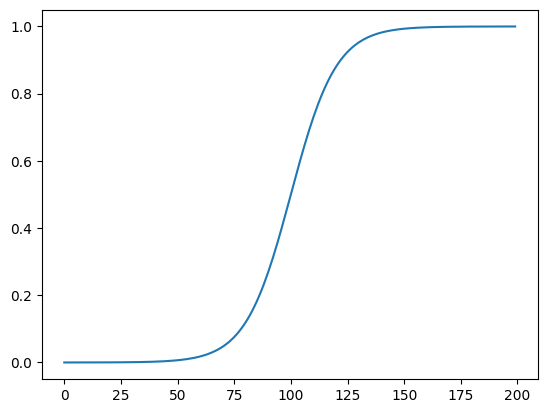

In [11]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [13]:
# Ci servirà la derivata della sigmoide

def dsigmoid(x):
  return x * (1. - x)

In [12]:
# Per la loss function trattiamo ogni datapoint come se fosse un intero dataset,
# cioè ritorniamo un vettore delle distanze.
# Consideriamo la semplice distanza, senza usare né modulo né quadrat

def loss(prediction, target):
  return target - prediction

## Neural network

Partiamo da un punto a caso, poi ottimizziamo i parametri usando una discesa del gradiente in modo da ottimizzare la loss function.

Avremo un processo iterativo. Come decidere quando fermarlo? Qui impostare un criterio di convergenza può essere pericoloso perché il modello è instabile. Allora setteremo semplicemente un numero di iterazioni (numero di epoche).

In [14]:
training = 6000 # Numero di epoche

In [18]:
# Layer of synopses / neurons
# (4 x 3) dot (3 x 1)

np.random.seed(302)

syn0 = 2 * np.random.random((3, 1)) - 1
print(syn0.shape)
print(syn0)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]


In [27]:
# Ricopiamo qui questi comandi in modo da inizializzare bene le sinapsi

np.random.seed(302)
syn0 = 2 * np.random.random((3, 1)) - 1

loss_output = []

for iter in range(training):
  inputLayer = X

  # Forward propagation
  # Linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  # Activations
  output = sigmoid(l1)

  # Calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # Backward propagation
  # Calculate correction
  output_delta = output_error * dsigmoid(output)

  # Apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("Output after training\n", output)
print("Output target\n", y)

Output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
Output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

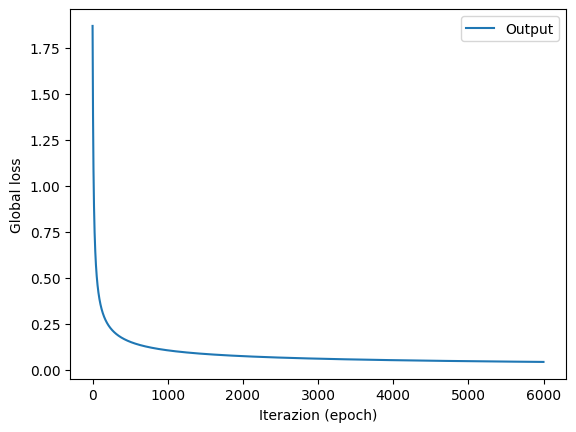

In [28]:
pl.plot(loss_output, label="Output")
pl.legend()
pl.xlabel("Iterazion (epoch)")
pl.ylabel("Global loss")